<a href="https://colab.research.google.com/github/vsevolod-BR/prictice/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
# метод уменьшения размерности (позволяет сократить число переменных в наборе)
from sklearn.decomposition import PCA

In [14]:
data = load_breast_cancer()
# разделяем датасет на фичи и таргеты
# X теперь содержит список признаков [[...],[...],...]
# Y содержит метки классов [0, 1, 0,...]
X, y = data.data, data.target
# разобьем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# нормируем данные
scaler = StandardScaler()
scaler.fit(X_train)
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)

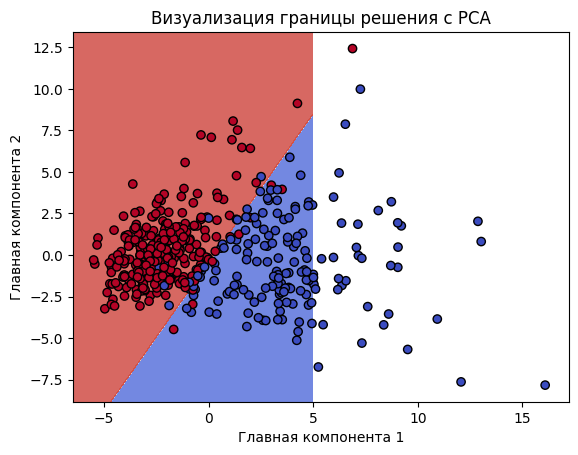

0.9790209790209791
0.99737962659679


In [47]:
# СТРОИМ ЛОГИСТИЧЕСКУЮ РЕГРЕССИЮ
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
# не мог понять, зачем дважды строить log_reg для обычной и приведенной выборки (понял позже, что score проверяют на непреобразованной выборке, а график строят на преобразованной)
# сперва применим РСА, чтобы уменьшить число данных до 2 измерений
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
# создал отдельную переменную, чтобы не потерять изначальные данные (они понадобятся для SVC)
# далее начинаем работу с регрессией
log_reg_pca = LogisticRegression()
log_reg_pca.fit(X_train_pca, y_train)
# создаем сетку для визуализации данных
h = 0.02
x_min, x_max = X_train_pca[:,0].min() - 1, X_train[:,0].max() + 1
# -1 и +1 это отступы от осей графика, для комфортного отображения
# [:,0] - отбор по первому параметру (столбцу), [:,1] - по второму параметру (столбцу), .min() - поиск минимального
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
ox, oy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# arange(A, B, C) - создает одномерный массив, заполненный числами от A до B с шагом C
# meshgrid(A, B) - принимает два одномерных массива А и В и создает два двумерных массива (содержащие кординаты для каюдой точки в сетке)
# ox - содержит значения по оси X для каждой точки сетки (аналогично oy)
Z = np.c_[ox.ravel(), oy.ravel()]
# .ravel() - преобразует массив в одномерный [[1,2],[3,4]] -> [1,2,3,4]
# .c_[A, B, C] - объединяет одномерные массивы в многомерный A[1,2] B[3,4] C[5,6] -> [[1,3,5],[2,4,6]]
Z = log_reg_pca.predict(Z)
# предсказываем класс в каждой точке сетки
Z = Z.reshape(ox.shape)
# .reshape() - изменяет размерность массива, .shape - находит размерность массива
# Т.е. изменяем размерность массива Z так, чтобы она совпадала с размерностью массива ox
# далее строим сам график используя библиотеку matplotlib.pyplot
plt.contourf(ox, oy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('Визуализация границы решения с PCA')
plt.show()
# так и не понял, почему только половина сетки закрашена
# далее оцениваем качество полученной модели f1 и roc_auc метриками
f1 = f1_score(y_test, log_reg.predict(X_test))
auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
print(f1)
print(auc)

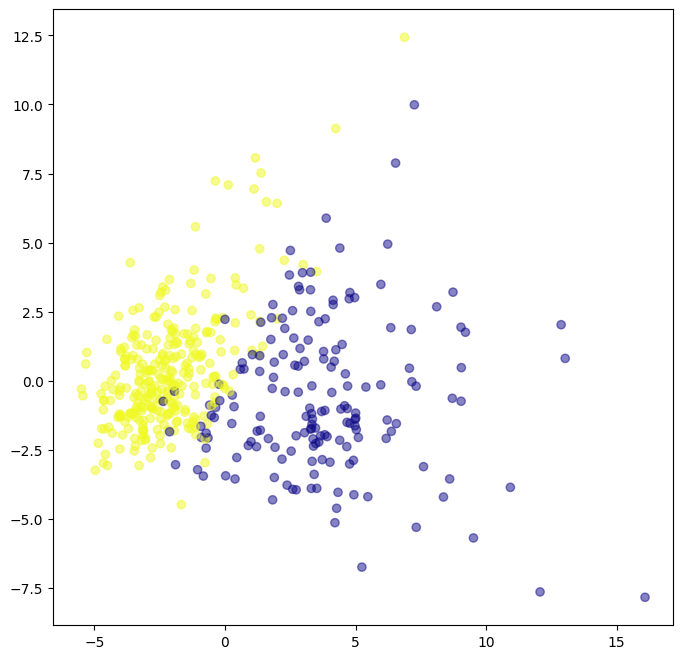

0.9645390070921985
0.9963969865705863


In [40]:
# ТЕПЕРЬ РЕШАЕМ МЕТОДОМ ОПОРНЫХ ВЕКТОРОВ (liner)
svm_linear = SVC(kernel='linear', probability=True)
# propability=True - включает оценку вероятностей классов, используя метод кросс-валидации
# это позволяет использовать етод .predict_proba() для получения вероятности принадлежности образцов к классам
svm_linear.fit(X_train, y_train)
# визуализация границы принятия решений для SVC с ядром "linear"
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
plt.figure(figsize=(8, 8))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = y_train, alpha = 0.5, cmap = 'plasma')
# c=y_train - цвета точек будут определяться значениями из массива y_train (который представляет классы (0,1))
# alpha - прозрачность (от 0 до 1)
# cmap - определяет тип цветовой схемы
plt.show()
SVC_liner_f1 = f1_score(y_test, svm_linear.predict(X_test))
SVC_roc_auc = roc_auc_score(y_test, svm_linear.predict_proba(X_test)[:, 1])
print(SVC_liner_f1)
print(SVC_roc_auc)

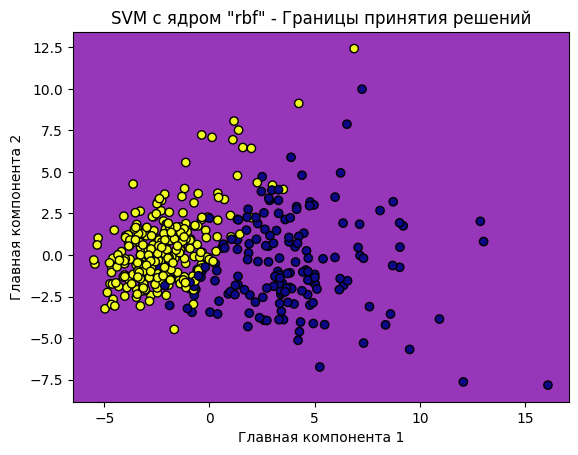

0.9963969865705863
0.9645390070921985


In [51]:
# ТЕПЕРЬ РЕШАЕМ МЕТОДОМ ОПОРНЫХ ВЕКТОРОВ (rbf - стандарт)
svm_rbf = SVC(kernel='rbf', probability=True)
svm_rbf.fit(X_train, y_train)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

h = 0.02
x_max, x_min = X_train_pca[:,0].max() + 1, X_train_pca[:,0].min() - 1
y_max, y_min = X_train_pca[:,1].max() + 1, X_train_pca[:,1].min() - 1
ox, oy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# далее неадекватный мув с обратным преобразованием (повышением размерности) из объединенных данных
# его нужно найти в видеоразборе и тщательно изучить
meshgrid_original = pca.inverse_transform(np.c_[ox.ravel(), oy.ravel()])
# обратное преобразование с использованием масштабирования (ОЧЕНЬ ВНИМАТЕЛЬНО РАЗОБРАТЬ)
meshgrid_scaled = scaler.inverse_transform(meshgrid_original)

Z = svm_rbf.predict(meshgrid_scaled)
Z = Z.reshape(ox.shape)

plt.contourf(ox, oy, Z, cmap=plt.cm.plasma, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.plasma, edgecolors='k')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('SVM с ядром "rbf" - Границы принятия решений')
plt.show()
auc = roc_auc_score(y_test, svm_linear.predict_proba(X_test)[:, 1])
f1 = f1_score(y_test, svm_linear.predict(X_test))
print(auc)
print(f1)